In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
df = pd.read_csv("/content/Generated CKD.csv")

In [ ]:
df.head(5);

In [ ]:
df.shape

(5000, 26)

In [ ]:
df.isnull().sum()

,0
id,0
age,159
bp,162
sg,519
al,514
su,545
rbc,1854
pc,792
pcc,59
ba,46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      5000 non-null   int64  
 1   age     4841 non-null   float64
 2   bp      4838 non-null   float64
 3   sg      4481 non-null   float64
 4   al      4486 non-null   float64
 5   su      4455 non-null   float64
 6   rbc     3146 non-null   object 
 7   pc      4208 non-null   object 
 8   pcc     4941 non-null   object 
 9   ba      4954 non-null   object 
 10  bgr     4472 non-null   float64
 11  bu      4782 non-null   float64
 12  sc      4809 non-null   float64
 13  sod     3973 non-null   float64
 14  pot     3973 non-null   float64
 15  hemo    4417 non-null   float64
 16  pcv     4162 non-null   float64
 17  wbcc    3723 non-null   float64
 18  rbcc    3435 non-null   float64
 19  htn     4958 non-null   object 
 20  dm      4926 non-null   object 
 21  cad     4950 non-null   object 
 22  

In [ ]:
# Fill missing values median is most robust to outliers.
#If you use mode here, you’re filling missing values with the
#most frequent single value — but often numeric data doesn’t repeat much.
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [ ]:
 # Fill categorical NaN with mode
 #Categorical data doesn’t have a mean or median.
#Example: rbc = [normal, normal, abnormal, NaN]
#Mode = "normal".
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))
#mode() may return multiple values if there’s a tie, but [0] picks the first one.

In [ ]:
df.head(12)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,385,57.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,42.0,11000.0,4.5,no,no,no,good,no,no,notckd
1,90,50.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,7900.0,4.8,no,no,no,poor,no,no,ckd
2,50,60.0,70.0,1.010,2.0,0.0,normal,abnormal,present,notpresent,...,29.0,21600.0,3.5,yes,yes,no,poor,no,yes,ckd
3,145,68.0,70.0,1.010,0.0,2.0,normal,normal,notpresent,notpresent,...,28.0,12200.0,3.9,yes,yes,no,poor,no,no,ckd
4,297,41.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,41.0,6300.0,5.9,no,no,no,good,no,no,notckd
5,48,11.0,80.0,1.010,3.0,0.0,normal,normal,notpresent,notpresent,...,45.0,8600.0,4.8,no,no,no,good,no,no,ckd
6,379,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,42.0,7700.0,5.5,no,no,no,good,no,no,notckd
7,195,80.0,70.0,1.010,2.0,0.0,normal,abnormal,notpresent,notpresent,...,41.0,7900.0,4.8,yes,yes,no,good,no,no,ckd
8,310,51.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,8100.0,5.9,no,no,no,good,no,no,notckd
9,181,73.0,90.0,1.010,1.0,4.0,abnormal,abnormal,present,notpresent,...,28.0,7900.0,4.8,no,yes,no,good,no,no,ckd


In [ ]:
df.shape

(5000, 26)

In [ ]:
df.isnull().sum()

,0
id,0
age,0
bp,0
sg,0
al,0
su,0
rbc,0
pc,0
pcc,0
ba,0


In [ ]:
# Encode categorical variables
label_encoders = {}  #create an empty dictionary
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Save encoders in dict if needed later eg:["abnormal","normal"]

In [ ]:
# Normalize numerical columns
#This code ensures all numeric features are transformed to [0, 1] range,
# making them comparable and helping ML models learn effectively.
scaler = MinMaxScaler()  #eg:bp = [80, 120, 200].
df[num_cols] = scaler.fit_transform(df[num_cols])  #So after scaling → bp = [0, 0.33, 1].

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.962406,0.625000,0.076923,0.75,0.0,0.0,1,1,0,0,...,0.733333,0.416667,0.058680,0,0,0,0,1,0,1
1,0.223058,0.545455,0.153846,0.75,0.0,0.0,1,1,0,0,...,0.711111,0.299242,0.066015,0,0,0,2,1,0,0
2,0.122807,0.659091,0.153846,0.25,0.4,0.0,1,0,1,0,...,0.444444,0.818182,0.034230,1,1,0,2,1,1,0
3,0.360902,0.750000,0.153846,0.25,0.0,0.4,1,1,0,0,...,0.422222,0.462121,0.044010,1,1,0,2,1,0,0
4,0.741855,0.443182,0.153846,0.75,0.0,0.0,1,1,0,0,...,0.711111,0.238636,0.092910,0,0,0,0,1,0,1


In [ ]:
# Save preprocessed data
df.to_csv("ckd_preprocessed.csv", index=False)  # Save to CSV

In [ ]:

print("Preprocessing complete. Data saved as 'ckd_preprocessed.csv'.")

Preprocessing complete. Data saved as 'ckd_preprocessed.csv'.


In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.962406,0.625000,0.076923,0.75,0.0,0.0,1,1,0,0,...,0.733333,0.416667,0.058680,0,0,0,0,1,0,1
1,0.223058,0.545455,0.153846,0.75,0.0,0.0,1,1,0,0,...,0.711111,0.299242,0.066015,0,0,0,2,1,0,0
2,0.122807,0.659091,0.153846,0.25,0.4,0.0,1,0,1,0,...,0.444444,0.818182,0.034230,1,1,0,2,1,1,0
3,0.360902,0.750000,0.153846,0.25,0.0,0.4,1,1,0,0,...,0.422222,0.462121,0.044010,1,1,0,2,1,0,0
4,0.741855,0.443182,0.153846,0.75,0.0,0.0,1,1,0,0,...,0.711111,0.238636,0.092910,0,0,0,0,1,0,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [ ]:
df = pd.read_csv("/content/ckd_preprocessed.csv")


/tmp/ipython-input-2334415069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette='Set2')


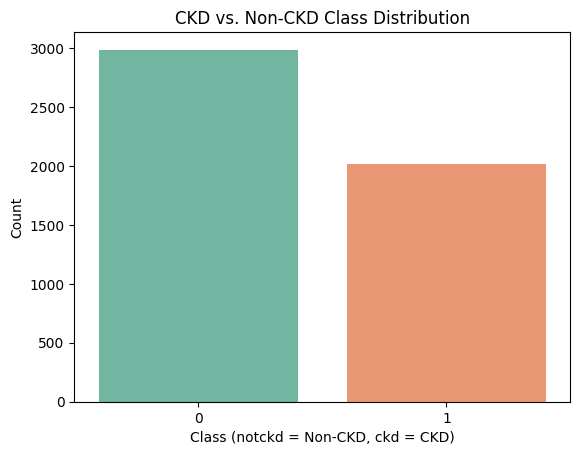

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of CKD vs. Non-CKD class distribution
sns.countplot(x='class', data=df, palette='Set2')
plt.title('CKD vs. Non-CKD Class Distribution')
plt.xlabel('Class (notckd = Non-CKD, ckd = CKD)')
plt.ylabel('Count')
plt.show()


In [ ]:
# Split features (X) and target (y)
X = df.drop(columns=['class'])  # Assuming 'class' is the target column
y = df['class']

In [ ]:
# Split into training and testing sets (80% train, 20% test)
#random_state=42 → makes sure you always get the same train-test split every time you run.
#we can use any numbers.
#Ensures reproducibility of your results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train XGBoost model
xgb_model = XGBClassifier( eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")


XGBoost Accuracy: 1.0000


In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=20, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)


In [ ]:
# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 1.0000


In [ ]:
# Feature scaling (important for SVM)
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train SVM model
svm_model = SVC(kernel='rbf', random_state=42)  # You can try 'linear', 'poly', 'rbf'
svm_model.fit(X_train, y_train)


SVC(random_state=42)

In [ ]:
# Predictions
y_pred = svm_model.predict(X_test)

In [ ]:
# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[568   0]
 [  0 432]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       568
           1       1.00      1.00      1.00       432

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [ ]:
print("Training Accuracy:", svm_model.score(X_train, y_train))
print("Test Accuracy:", svm_model.score(X_test, y_test))

Training Accuracy: 0.9995
Test Accuracy: 1.0


In [ ]:
# Define a simple feedforward neural network
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),#i/p
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7973 - loss: 0.4456 - val_accuracy: 1.0000 - val_loss: 0.0280
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 0.0078
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9986 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9995 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0021
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9996 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9996 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9993 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 8.4041e-04
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9995 - loss: 0.0042 - val_accuracy

In [ ]:
# Evaluate the model
nn_loss, nn_accuracy = model.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.1157e-04 
Neural Network Accuracy: 1.0000


In [ ]:
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


XGBoost Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Neural Network Accuracy: 1.0000


In [ ]:
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


XGBoost Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Neural Network Accuracy: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score

# Apply cross-validation to XGBoost
xgb_cv_scores = cross_val_score(XGBClassifier(eval_metric='logloss'), X, y, cv=5)
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean():.4f}")

# Apply cross-validation to Random Forest
rf_cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")


XGBoost Cross-Validation Accuracy: 0.9994
Random Forest Cross-Validation Accuracy: 0.9996


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Use Input() explicitly
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cv_scores = []

for train_idx, val_idx in kf.split(X):
    X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Define model
    model = models.Sequential([
        layers.Input(shape=(X_train_fold.shape[1],)),
        layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=30, batch_size=16, verbose=0)

    # Evaluate on validation fold
    loss, acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(acc)

# Print cross-validation accuracy
print(f"Neural Network Cross-Validation Accuracy: {np.mean(cv_scores):.4f}")


Neural Network Cross-Validation Accuracy: 0.9982


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


XGBoost Accuracy: 0.9270
XGBoost Confusion Matrix:
[[568   0]
 [ 73 359]]


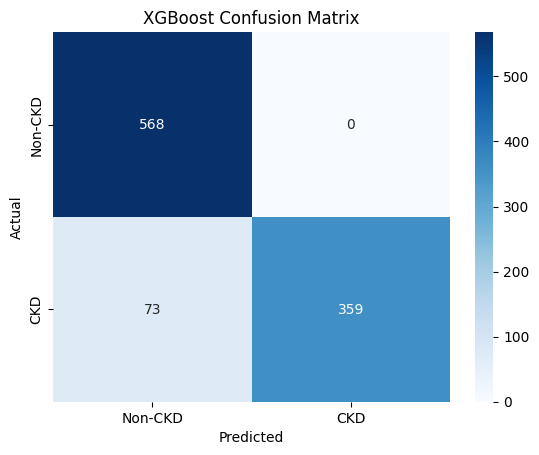

In [ ]:
# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Confusion Matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")
print(xgb_cm)

# Plot Confusion Matrix
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-CKD', 'CKD'], yticklabels=['Non-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


Random Forest Accuracy: 0.9130
Random Forest Confusion Matrix:
[[568   0]
 [ 87 345]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


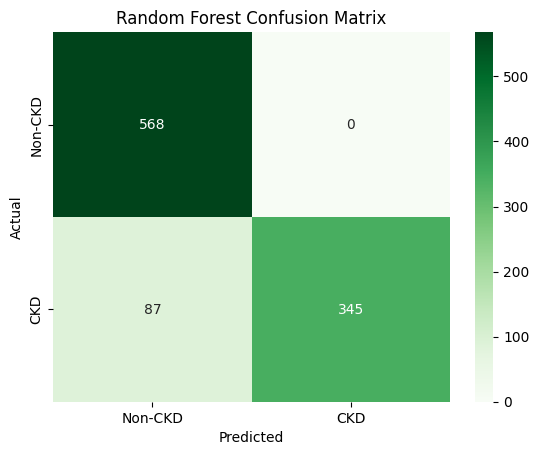

In [ ]:
# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix:")
print(rf_cm)

# Plot Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Non-CKD', 'CKD'], yticklabels=['Non-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Network Accuracy: 0.9980
Neural Network Confusion Matrix:
[[566   2]
 [  0 432]]


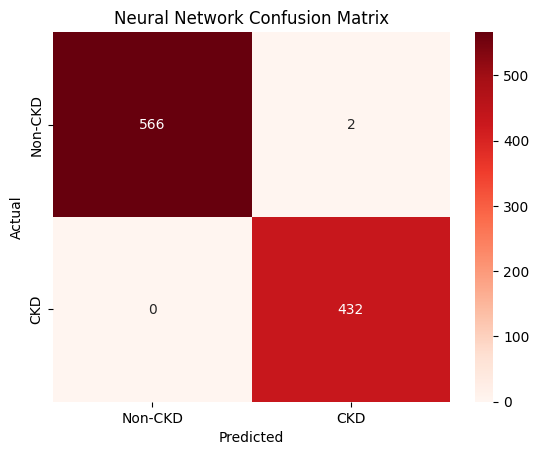

In [ ]:
# Predictions
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Accuracy
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

# Confusion Matrix
nn_cm = confusion_matrix(y_test, y_pred_nn)
print("Neural Network Confusion Matrix:")
print(nn_cm)

# Plot Confusion Matrix
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Non-CKD', 'CKD'], yticklabels=['Non-CKD', 'CKD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()


In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Non-CKD', 'CKD']))

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Non-CKD', 'CKD']))

print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['Non-CKD', 'CKD']))


XGBoost Classification Report:
              precision    recall  f1-score   support

     Non-CKD       0.89      1.00      0.94       568
         CKD       1.00      0.83      0.91       432

    accuracy                           0.93      1000
   macro avg       0.94      0.92      0.92      1000
weighted avg       0.94      0.93      0.93      1000

Random Forest Classification Report:
              precision    recall  f1-score   support

     Non-CKD       0.87      1.00      0.93       568
         CKD       1.00      0.80      0.89       432

    accuracy                           0.91      1000
   macro avg       0.93      0.90      0.91      1000
weighted avg       0.92      0.91      0.91      1000

Neural Network Classification Report:
              precision    recall  f1-score   support

     Non-CKD       1.00      1.00      1.00       568
         CKD       1.00      1.00      1.00       432

    accuracy                           1.00      1000
   macro avg       1.0